# Title: Artificial Neural Network Implementation from Scratch

The below implementation for Artificial Neural Network is a Brute Force implementation for binary classification of data into 0 or 1 based on the features of count n.This algorithm would work well for binary classification, but not multi-class classification because a lot of code for loss function and activation is hard coded to suitthe task.
Task: Implementation of an Artificial Neural Network for programming project assignment for Machine Learning and Data Mining course by Dr. Huajie Zhang atUniversity of New Brunswick.



# About the Dataset

This is the dataset that was provided with the assignment:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Environment

Programming Language: Python 3.12.0

IDE: PyCharm Professional 23.1

Libraries Used: Numpy, Pandas, UCIMLRepo, SKLearn, Math, Matplotlib

# Imports

The below code is to import different libraries and modules to build an artificial neural network. Since the ANN is being built from scratch, too many libraries are notneeded.

In [1]:
import numpy as np # Standard library for data science
import pandas as pd # Standard library for data science
from ucimlrepo import fetch_ucirepo # To fetch the breast cancer data

# For standardizing features and encoding categorical labels to 0 or 1
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Split the input/output data to train and test data.
from sklearn.model_selection import train_test_split

# To check the model for accuracy
from sklearn.metrics import accuracy_score
import math

# For any standard math operations
import matplotlib.pyplot as plt

# To plot any graphs
import seaborn as sns

# Magic

Below module is the crux of this whole ANN implementation. This is where all the magic is happening.

Weights, Bias, Activation, Forward Propagation, Cost, Loss, Derivatives, Learning Rate, Backward Propagation. Repeat (IYKYK).

In this code, the activation function is sigmoid and loss function is mean squared error.

Why: Multiple experiements with relu, softmax etc. didn't achieve good results. Same for loss functions - categorical cross entropy and sparse categorical crossentropy were used for initial experiments. After a lot of research, trial and error, sigmoid and MSE work well for basic binary classification task with an ANNimplemented from scratch.

In [113]:
# Base Neural Network class which is used to build, train and predict values for the model.

class NeuralNet:
    def __init__(self, X: np.ndarray, y: np.ndarray, layer_sizes, alpha):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.layer_sizes = layer_sizes
        self.L = len(layer_sizes) - 1  # Number of layers (excluding input layer)

        # Initialize weights and biases for each layer
        self.W = {}
        self.b = {}
        for l in range(1, self.L + 1):
            self.W[str(l)] = np.random.randn(
                layer_sizes[l], layer_sizes[l - 1]
            ) * math.sqrt(2 / layer_sizes[l - 1])
            self.b[str(l)] = np.zeros((layer_sizes[l], 1))

        # Cache for intermediate values in forward pass
        self.cache = {}

    @staticmethod
    def sigmoid(arr):
        # Sigmoid activation function.
        return 1 / (1 + np.exp(-arr))

    @staticmethod
    def sigmoid_derivative(arr):
        # Derivative of the sigmoid function.
        return arr * (1 - arr)

    @staticmethod
    def relu(x):
        return np.maximum(x, 0)

    @staticmethod
    def relu_derivative(x):
        return np.heaviside(x, 0)

    def forward(self, X):
        # Forward propagation through all layers.
        A = X
        self.cache["A0"] = A  # Store the input layer activation
        for l in range(1, self.L + 1):
            Z = self.W[str(l)] @ A + self.b[str(l)]
            A = self.sigmoid(Z)
            self.cache[f"A{l}"] = A  # Cache activation
        return A

    def predict(self, X):
        return self.forward(X)

    def compute_cost(self, y_hat, y):
        # Calculate mean squared error as cost.
        m = y.shape[1]
        return np.sum((y_hat - y) ** 2) / (2 * m)

    def backward(self, y_hat):
        # Backward propagation to compute gradients for weights and biases.
        m = self.X.shape[1]
        grads = {}
        dA = (
            y_hat - self.y
        ) / m  # Initial gradient based on cost function (mean squared error)

        for l in reversed(range(1, self.L + 1)):
            dZ = dA * self.sigmoid_derivative(self.cache[f"A{l}"])  # Element-wise gradient
            grads[f"dW{l}"] = dZ @ self.cache[f"A{l - 1}"].T
            grads[f"db{l}"] = np.sum(dZ, axis=1, keepdims=True)
            if l > 1:  # Calculate dA for the previous layer if not at the input layer
                dA = self.W[str(l)].T @ dZ

        return grads

    def update_parameters(self, grads):
        # Update weights and biases using gradients.
        for l in range(1, self.L + 1):
            self.W[str(l)] -= self.alpha * grads[f"dW{l}"]
            self.b[str(l)] -= self.alpha * grads[f"db{l}"]

    def train(self, epochs=1000):
        # Train the network for a set number of epochs.
        for epoch in range(epochs):
            y_hat = self.forward(self.X)
            cost = self.compute_cost(y_hat, self.y)
            grads = self.backward(y_hat)
            self.update_parameters(grads)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")

    def predict(self, X):
        # Predict output for given input data.
        return self.forward(X)

    def accuracy(self, y_hat, y):
        # Compute accuracy as percentage of correct predictions (rounded).
        predictions = np.round(y_hat)  # Rounding since outputs are continuous
        accuracy = np.mean(predictions == y) * 100
        return accuracy


# Data Fetching and Preprocessing

This model was specifically developed to classify the diagnostic data of images for breast cancer cells to classify as 'B' or 'M'. More details about what they meancan be found in the dataset page. There wasn't much preprocessing needed for the data as there were no missing data or outliers as mentioned in the datasetpage. This helped in just focusing on standardization and label encoding of data and preparing data for training the ANN.

In [74]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


# To scale and standardize X
scaler = StandardScaler()

# To encode the labels of y
encoder = LabelEncoder()

# Scaled
X_scaled = scaler.fit_transform(X)

# Reshaped to a 1D array to suppress a warning from LabelEncoder
y = np.array(y).reshape(-1)

# Encoded
y = encoder.fit_transform(y)

# Reshaped back to a 2D array after encoding
y = np.array(y).reshape(-1, 1)

# Split X to X_train, X_test and y to y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, shuffle=True)

X_train = X_train.T  # Transpose to shape (30, 426)
y_train = y_train.T  # Transpose to shape (1, 426)
X_test = X_test.T  # Transpose to shape (30, 143)
y_test = y_test.T  # Transpose to shape (1, 143)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30, 426), (1, 426), (30, 143), (1, 143))

# Training

layer_sizes specifies the number of layers and number of neurons each layer uses. The length of layer_sizes is the total number of layers we use and the size ofeach layer is the number of neurons in that layer.

For example: layer_sizes=[30, 100, 10, 1] means that there are a total of 4 layers, including 1 input layer, 2 hidden layers and 1 output layer.

30 indicates that there are 30 neurons in the input layer, 100 in the first hidden layer and 10 in the second. Only one neuron in output layer for predicting the labelof y.

The model was trained for different epochs to see how well it performs as the number of iterations increases. After a lot of experimentation, 0.01 learning rateworked best for most cases.

In [87]:
# To store multiple models
models = []

# Testing with multiple epoch counts to evaluate the best epoch count
epochs=[10, 100, 1000, 5000, 10000]

# Iterating for every epoch count, and initializing a model for each
for epoch in epochs:
    # Model initialization
    model = NeuralNet(X_train, y_train, layer_sizes=[30, 100, 10, 1], alpha=0.01)
    
    # Train the model with epoch count
    model.train(epochs=epoch)
    models.append(model)

# Predict values for every epoch
y_pred_array = [model.predict(X_test) for model in models]

Epoch 0, Cost: 0.10748675356041129
Epoch 0, Cost: 0.13500955681811105
Epoch 0, Cost: 0.16520182945418146
Epoch 100, Cost: 0.13164190711656504
Epoch 200, Cost: 0.1136566206853964
Epoch 300, Cost: 0.10449604037406054
Epoch 400, Cost: 0.09908297619631976
Epoch 500, Cost: 0.09518814194142751
Epoch 600, Cost: 0.09192551531552982
Epoch 700, Cost: 0.08894355618921909
Epoch 800, Cost: 0.08610219986037088
Epoch 900, Cost: 0.08334607427253138
Epoch 0, Cost: 0.12655828347740633
Epoch 100, Cost: 0.12313207979330536
Epoch 200, Cost: 0.11980470256009032
Epoch 300, Cost: 0.11659264872490793
Epoch 400, Cost: 0.11349197488791535
Epoch 500, Cost: 0.11048709468981692
Epoch 600, Cost: 0.10756106712812577
Epoch 700, Cost: 0.1047026862587927
Epoch 800, Cost: 0.10190824867340849
Epoch 900, Cost: 0.09917924277985331
Epoch 1000, Cost: 0.09651887308077226
Epoch 1100, Cost: 0.09392960354606815
Epoch 1200, Cost: 0.09141223881073576
Epoch 1300, Cost: 0.08896603605214659
Epoch 1400, Cost: 0.08658921526047243
Epoch 

# Results and Metrics

Metrics for every epoch were calculated and combined the flattened version of y_test and y_pred to view random samples.

In [93]:
# Metrics and results comparison for 10 epochs

accuracy_10 = model.accuracy(y_pred_array[0], y_test)

results_10_epochs = pd.DataFrame(
    {"Actuals": y_test.flatten(), "Predictions": np.round(y_pred_array[0].flatten())}
)

print(f"Test Accuracy: {accuracy_10}%")
print(f"Test results: \n{results_10_epochs.sample(8)}")

Test Accuracy: 58.04195804195804%
Test results: 
     Actuals  Predictions
40         0          0.0
109        0          0.0
113        0          0.0
126        0          0.0
95         1          0.0
42         0          0.0
135        1          0.0
79         1          0.0


In [94]:
# Metrics and results comparison for 100 epochs

accuracy_100 = model.accuracy(y_pred_array[1], y_test)

results_100_epochs = pd.DataFrame(
    {"Actuals": y_test.flatten(), "Predictions": np.round(y_pred_array[1].flatten())}
)

print(f"Test Accuracy: {accuracy_100}%")
print(f"Test results: \n{results_100_epochs.sample(8)}")

Test Accuracy: 58.04195804195804%
Test results: 
     Actuals  Predictions
129        1          0.0
72         0          0.0
140        1          0.0
8          0          0.0
5          0          0.0
39         0          0.0
18         0          0.0
91         1          0.0


In [95]:
# Metrics and results comparison for 1000 epochs

accuracy_1000 = model.accuracy(y_pred_array[2], y_test)

results_1000_epochs = pd.DataFrame(
    {"Actuals": y_test.flatten(), "Predictions": np.round(y_pred_array[2].flatten())}
)

print(f"Test Accuracy: {accuracy_1000}%")
print(f"Test results: \n{results_1000_epochs.sample(8)}")

Test Accuracy: 82.51748251748252%
Test results: 
     Actuals  Predictions
7          0          0.0
32         1          1.0
69         0          0.0
84         1          1.0
118        1          0.0
65         0          0.0
134        0          0.0
29         0          0.0


In [96]:
# Metrics and results comparison for 5000 epochs

accuracy_5000 = model.accuracy(y_pred_array[3], y_test)

results_5000_epochs = pd.DataFrame(
    {"Actuals": y_test.flatten(), "Predictions": np.round(y_pred_array[3].flatten())}
)

print(f"Test Accuracy: {accuracy_5000}%")
print(f"Test results: \n{results_5000_epochs.sample(8)}")

Test Accuracy: 94.4055944055944%
Test results: 
     Actuals  Predictions
136        0          0.0
55         0          0.0
10         0          0.0
76         1          0.0
110        0          0.0
14         1          1.0
82         0          0.0
132        0          0.0


In [97]:
# Metrics and results comparison for 10000 epochs

accuracy_10000 = model.accuracy(y_pred_array[4], y_test)

results_10000_epochs = pd.DataFrame(
    {"Actuals": y_test.flatten(), "Predictions": np.round(y_pred_array[4].flatten())}
)

print(f"Test Accuracy: {accuracy_10000}%")
print(f"Test results: \n{results_10000_epochs.sample(8)}")

Test Accuracy: 96.5034965034965%
Test results: 
    Actuals  Predictions
40        0          0.0
23        1          1.0
64        0          0.0
71        1          1.0
82        0          0.0
79        1          1.0
84        1          1.0
7         0          0.0


# Graph

A visual representation of how well the accuracy increases with the increase in number of epochs

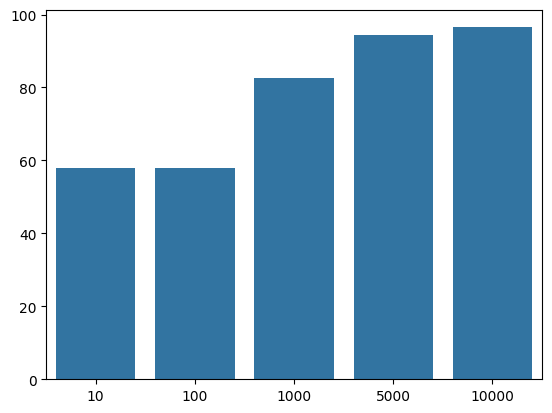

In [112]:
accuracy_combined = [accuracy_10, accuracy_100, accuracy_1000, accuracy_5000, accuracy_10000]

sns.barplot(x=epochs, y=accuracy_combined)
plt.show()

# Conclusion

As seen in the above graph, after training the model with multiple epoch counts, the accuracy increases as the epoch count increased and the jump was visibly higher between 10, 100 and 1000. The increase in accuracy between 1000, 5000 and 10000 is not that high but still significant.

# Future Work

The model is hard-coded and also very static as of right now. It could be made more dynamic by adding logic for adding different layers in Keras style (Ex:model.add(InputLayer())). Improvements to include different loss functions, activation functions, optimizers can also be made. The model could also be moreobject oriented by defining a base Layer class which has children InputLayer, HiddenLayer or Dense, OutputLayer etc. Neuron class with seperate weights andbias could also be implemented.

Additonally, differnt model callbacks like ModelCheckpoint to save the model's weights and bias, EarlyStopping to stop the model early if the training or validationloss is not improving, ReduceLearningRateOnPlateau to decrease learning rate if no improvement in loss etc. could also be implemented.

# References and Acknowledgements

1. https://medium.com/@waadlingaadil/learn-to-build-a-neural-network-from-scratch-yes-really-cac4ca457efc - Thanks to this article, I learned 90% of what ANNs actually do.
2. https://medium.com/analytics-vidhya/creating-keras-from-scratch-part-1-50599413ebc7
3. https://www.parasdahal.com/softmax-crossentropy
4. https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=tMVHHor1fqCwSSF7 - A must watch for learning Neural Networks
5. https://youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&si=7GLSl2fbrpdAynCE - Another golden playlist to understand the concepts of Neural Networks

Finally, my sincere thanks to Dr. Huajie Zhang for providing such a wonderful assignment. I learned many things in the process learning and implementing a neural network.